Version 1.0.2

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task 0

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
print(transactions.shape   )
print(items.shape          )
print(item_categories.shape)
print(shops.shape          )

(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)


In [5]:
print("TRANSACTIONS DF:\n", transactions.head())    
print("ITEMS DF:\n", items.head())           
print("ITEM CATEGORIES DF:\n", item_categories.head()) 
print("SHOPS DF:\n", shops.head())           

TRANSACTIONS DF:
          date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
ITEMS DF:
                                            item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
ITEM

# Some more set up

## Set up time filtering function

In [9]:
import datetime

def check_dates(start, end, date):
    return (date >= start) & (date < end)

## Add columns

There are a few columns I will add throughout this analysis. I'll move it up to the top and do it here. 

[X] Date in datetime format  
[X] Item revenue: Multiply number purchased by price  
[X] Item category    

In [6]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
transactions['date_dt'] = pd.to_datetime(transactions['date'], format = "%d.%m.%Y")
transactions['item_revenue'] = transactions['item_price'] * transactions['item_cnt_day']

dict_item_to_cat = items.set_index('item_id')['item_category_id'].to_dict()
transactions['item_category'] = transactions['item_id'].map(dict_item_to_cat)

transactions.head(20)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,date_dt,item_revenue,item_category
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,999.00,37
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,899.00,58
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05,-899.00,58
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,1709.05,58
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,1099.00,56
5,10.01.2013,0,25,2564,349.00,1.0,2013-01-10,349.00,59
6,02.01.2013,0,25,2565,549.00,1.0,2013-01-02,549.00,56
7,04.01.2013,0,25,2572,239.00,1.0,2013-01-04,239.00,55
8,11.01.2013,0,25,2572,299.00,1.0,2013-01-11,299.00,55
9,03.01.2013,0,25,2573,299.00,3.0,2013-01-03,897.00,55


In [13]:
transactions.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_revenue,item_category
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,1.157732e+03,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,5.683604e+03,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,-6.897000e+04,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.490000e+02,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.490000e+02,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,1.078200e+03,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,1.829990e+06,8.300000e+01


# Task 1

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

**Patricia notes** -----------------  

Here are the steps in this task:

[X] Identify transactions during September 2014. I will use the [datetime package](https://www.programiz.com/python-programming/datetime/strptime)   
[X] Group by shops  
[X] For each shop, sum the purchases and returns separately  
[ ] Find the maximum among shops  

**End notes** --------------------


In [16]:
# September 2014
start = datetime.datetime(day=1,month=9,year=2014)
end   = datetime.datetime(day=1,month=10,year=2014)

trans_sept14 = transactions[check_dates(start,end,transactions['date_dt'])]
print(trans_sept14.shape)

(73157, 9)


In [17]:
# Group by shops
max_shop = trans_sept14.groupby(['shop_id'])['item_revenue'].sum().idxmax()
max_rev  = trans_sept14.groupby(['shop_id'])['item_revenue'].sum().max()
print(max_shop, max_rev)
print(shops[shops['shop_id'] == max_shop]['shop_name'])

31 7982852.199999956
31    Москва ТЦ "Семеновский"
Name: shop_name, dtype: object


In [18]:
# YOUR CODE GOES HERE
max_revenue = max_rev
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


# Task 2

Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

**Patricia notes** -----------------  

Here are the steps in this task:

[X] Identify transactions in summer 2014 (June-Aug)  
[X] Group by category     
[X] For each category, sum the purchases  
[X] Find the maximum among categories    

**End notes** --------------------

In [19]:
# Find summer transactions
start = datetime.datetime(day=1,month=6,year=2014)
end   = datetime.datetime(day=1,month=9,year=2014)

trans_summer14 = transactions[check_dates(start,end,transactions['date_dt'])]
print(trans_summer14.shape)

(247782, 9)


In [20]:
# Group by item category
max_cat = trans_summer14.groupby(['item_category'])['item_revenue'].sum().idxmax()
max_rev = trans_summer14.groupby(['item_category'])['item_revenue'].sum().max()
print(max_cat,max_rev)

20 32157302.430000115


In [22]:
# YOUR CODE GOES HERE
category_id_with_max_revenue = max_cat
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


# Task 3

<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

**Patricia notes** -----------------  

Here are the steps in this task:

[X] Group by item  
[X] How many unique prices per item id? If 1, price is stable      
[X] Count how many have unique = 1

**End notes** --------------------

In [38]:
# YOUR CODE GOES HERE
num_items_constant_price = sum(transactions.groupby(['item_id'])['item_price'].nunique() == 1)
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


# Task 4

Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

**Patricia notes** -----------------  

Here are the steps in this task:

[ ] Find transactions for shop 25 in December 25    
[ ] Find days ^  
[ ] Calculate unbiased variance  

**End notes** --------------------

In [58]:
shop_id = 25

# Find Dec 2014 transactions
start = datetime.datetime(day=1,month=12,year=2014)
end   = datetime.datetime(day=1,month=1,year=2015)

trans_dec14 = transactions[check_dates(start,end,transactions['date_dt'])]
mask_shop25 = trans_dec14['shop_id'] == shop_id

trans_dec14_shop25 = trans_dec14[mask_shop25]
print(trans_dec14_shop25.shape)

(8684, 9)


In [62]:
count_per_day_series = trans_dec14_shop25.groupby(['date_dt'])['item_cnt_day'].sum()
count_per_day_series.head()

date_dt
2014-12-01    153.0
2014-12-02    169.0
2014-12-03    195.0
2014-12-04    164.0
2014-12-05    300.0
Name: item_cnt_day, dtype: float64

In [63]:
count_per_day_series.values

array([ 153.,  169.,  195.,  164.,  300.,  350.,  325.,  209.,  204.,
        143.,  214.,  297.,  432.,  305.,  225.,  192.,  285.,  325.,
        418.,  579.,  379.,  318.,  371.,  433.,  505.,  620.,  743.,
        662., 1966.,  776.])

In [66]:
count_per_day_series.index

DatetimeIndex(['2014-12-01', '2014-12-02', '2014-12-03', '2014-12-04',
               '2014-12-05', '2014-12-06', '2014-12-07', '2014-12-08',
               '2014-12-09', '2014-12-10', '2014-12-11', '2014-12-12',
               '2014-12-13', '2014-12-14', '2014-12-15', '2014-12-16',
               '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-20',
               '2014-12-21', '2014-12-22', '2014-12-23', '2014-12-24',
               '2014-12-25', '2014-12-26', '2014-12-27', '2014-12-28',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='date_dt', freq=None)

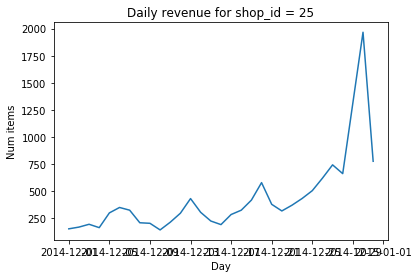

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [67]:
shop_id = 25

total_num_items_sold = count_per_day_series.values
days = count_per_day_series.index

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(total_num_items_sold, ddof=1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [ ]:
STUDENT_EMAIL = # EMAIL HERE
STUDENT_TOKEN = # TOKEN HERE
grader.status()

In [ ]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Well done! :)